<a href="https://colab.research.google.com/github/s8narnor/python-random-quote/blob/master/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!pip install -q keras

In [4]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [25]:
img_width, img_height = 32,32
train_data_dir = '/content/drive/My Drive/PlantVillage'
validation_data_dir = '/content/drive/My Drive/PlantVillage'
batch_size = 32

In [26]:
datagen = ImageDataGenerator(
    rescale =1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.3)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "training",
    class_mode = 'categorical')

val_datagen =ImageDataGenerator(rescale = 1./255)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "validation",
    class_mode = 'categorical')

Found 14458 images belonging to 15 classes.
Found 6189 images belonging to 15 classes.


In [27]:
from keras import layers
from keras.models import Model

def lenet_5(in_shape=(32,32,3), n_classes=15, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=20, kernel_size=5,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=5,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(500, activation='relu')(flatten)
    preds = layers.Dense(n_classes, activation='softmax')(dense1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = lenet_5()
    print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 50)        25050     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               1600

In [28]:
rms = keras.optimizers.RMSprop(learning_rate=0.001, rho = 0.9)

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['categorical_accuracy'])

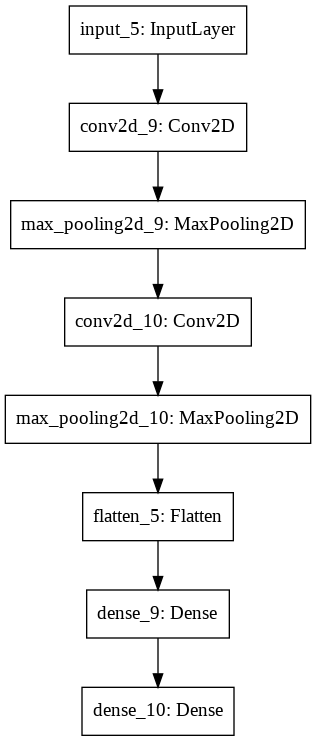

In [30]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png')

In [32]:
from keras.callbacks import History
history = History()
model.fit_generator(
    train_generator,
    steps_per_epoch =50,
    epochs =15, verbose =1, callbacks=[history],
    validation_data=validation_generator,
    validation_steps =40)

Epoch 1/15
50/50 [==============================] - 1386s 28s/step - loss: 2.4307 - categorical_accuracy: 0.2131 - val_loss: 2.0711 - val_categorical_accuracy: 0.2547
Epoch 2/15
50/50 [==============================] - 1176s 24s/step - loss: 2.2436 - categorical_accuracy: 0.2775 - val_loss: 2.1456 - val_categorical_accuracy: 0.3313
Epoch 3/15
50/50 [==============================] - 1206s 24s/step - loss: 2.0002 - categorical_accuracy: 0.3638 - val_loss: 1.8081 - val_categorical_accuracy: 0.4656
Epoch 4/15
50/50 [==============================] - 1180s 24s/step - loss: 1.8372 - categorical_accuracy: 0.4106 - val_loss: 2.1992 - val_categorical_accuracy: 0.4594
Epoch 5/15
50/50 [==============================] - 1062s 21s/step - loss: 1.6324 - categorical_accuracy: 0.4794 - val_loss: 1.8123 - val_categorical_accuracy: 0.4988
Epoch 6/15
50/50 [==============================] - 654s 13s/step - loss: 1.5332 - categorical_accuracy: 0.5169 - val_loss: 1.1453 - val_categorical_accuracy: 0.5063

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


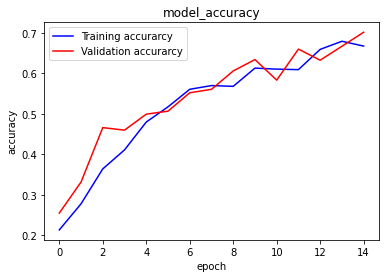

In [33]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'],'b', label='Training accurarcy')
plt.plot(history.history['val_categorical_accuracy'], 'r', label='Validation accurarcy')
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

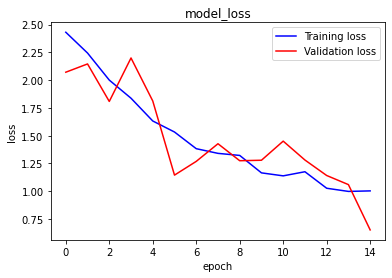

In [34]:
plt.plot(history.history['loss'],'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
model.save('LeNetKc.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)